In [13]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.13.0


In [14]:
# Create a list with the filepaths for training and testing
train_dir = Path(r"C:\Users\admin\Documents\TY\Sem-1\CV\Course_project\archive\train")

train_filepaths = list(train_dir.glob(r'*/*.jpg'))

In [15]:
test_dir = Path(r"C:\Users\admin\Documents\TY\Sem-1\CV\Course_project\archive\test")
test_filepaths = list(test_dir.glob(r'*/*.jpg'))

In [16]:
val_dir = Path(r"C:\Users\admin\Documents\TY\Sem-1\CV\Course_project\archive\validation")
val_filepaths = list(test_dir.glob(r'*/*.jpg'))

In [27]:
import os
import pandas as pd

def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    valid_paths = []
    labels = []

    for path in filepath:
        if os.path.exists(path):  # Check if the image file exists
            valid_paths.append(path)
            labels.append(os.path.basename(os.path.dirname(path)))
        else:
            print(f"Invalid path or file does not exist: {path}")
    
    filepath_series = pd.Series(valid_paths, name='Filepath').astype(str)
    labels_series = pd.Series(labels, name='Label')

    # Create DataFrame with filepaths and labels
    df = pd.concat([filepath_series, labels_series], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop=True)
    
    return df


In [29]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)


In [30]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2855

Number of different labels: 36

Labels: ['garlic' 'paprika' 'ginger' 'raddish' 'carrot' 'watermelon' 'corn'
 'beetroot' 'cabbage' 'turnip' 'apple' 'capsicum' 'mango' 'jalepeno'
 'lemon' 'eggplant' 'pomegranate' 'spinach' 'sweetcorn' 'orange'
 'chilli pepper' 'pineapple' 'bell pepper' 'grapes' 'kiwi' 'pear' 'tomato'
 'cauliflower' 'lettuce' 'banana' 'soy beans' 'potato' 'onion' 'cucumber'
 'peas' 'sweetpotato']


In [31]:
train_df.head(5)

,Filepath,Label
0,C:\Users\admin\Documents\TY\Sem-1\CV\Course_pr...,garlic
1,C:\Users\admin\Documents\TY\Sem-1\CV\Course_pr...,paprika
2,C:\Users\admin\Documents\TY\Sem-1\CV\Course_pr...,ginger
3,C:\Users\admin\Documents\TY\Sem-1\CV\Course_pr...,raddish
4,C:\Users\admin\Documents\TY\Sem-1\CV\Course_pr...,ginger


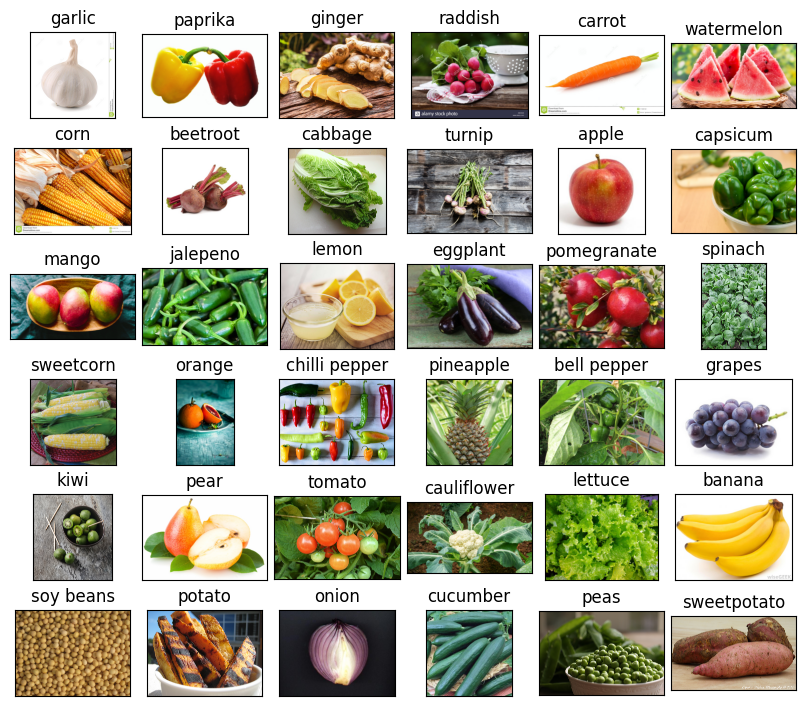

In [32]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [33]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [34]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2855 validated image filenames belonging to 36 classes.


In [35]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 340 validated image filenames belonging to 36 classes.


In [36]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 340 validated image filenames belonging to 36 classes.


In [37]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 [==============================] - 2s 0us/step


In [38]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 340 validated image filenames belonging to 36 classes.


In [39]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
90/90 [==============================] - 125s 1s/step - loss: 1.7776 - accuracy: 0.5268 - val_loss: 0.5489 - val_accuracy: 0.8176
Epoch 2/5
90/90 [==============================] - 92s 1s/step - loss: 0.5650 - accuracy: 0.8224 - val_loss: 0.2664 - val_accuracy: 0.9235
Epoch 3/5
90/90 [==============================] - 92s 1s/step - loss: 0.3299 - accuracy: 0.8956 - val_loss: 0.2340 - val_accuracy: 0.9500
Epoch 4/5
90/90 [==============================] - 91s 1s/step - loss: 0.2164 - accuracy: 0.9345 - val_loss: 0.1915 - val_accuracy: 0.9412
Epoch 5/5
90/90 [==============================] - 91s 1s/step - loss: 0.1435 - accuracy: 0.9562 - val_loss: 0.1573 - val_accuracy: 0.9588


In [40]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 [==============================] - 14s 1s/step


['lettuce',
 'paprika',
 'paprika',
 'lettuce',
 'apple',
 'sweetpotato',
 'kiwi',
 'turnip',
 'chilli pepper',
 'lemon',
 'mango',
 'spinach',
 'chilli pepper',
 'beetroot',
 'sweetpotato',
 'garlic',
 'banana',
 'turnip',
 'carrot',
 'garlic',
 'mango',
 'peas',
 'jalepeno',
 'soy beans',
 'corn',
 'paprika',
 'onion',
 'tomato',
 'pomegranate',
 'carrot',
 'sweetcorn',
 'grapes',
 'pear',
 'raddish',
 'ginger',
 'pear',
 'cabbage',
 'pineapple',
 'turnip',
 'sweetcorn',
 'jalepeno',
 'kiwi',
 'lemon',
 'cucumber',
 'cucumber',
 'apple',
 'pear',
 'spinach',
 'eggplant',
 'kiwi',
 'bell pepper',
 'garlic',
 'paprika',
 'cabbage',
 'lemon',
 'pineapple',
 'pineapple',
 'cabbage',
 'sweetcorn',
 'pineapple',
 'peas',
 'sweetcorn',
 'pineapple',
 'kiwi',
 'raddish',
 'ginger',
 'soy beans',
 'tomato',
 'pomegranate',
 'corn',
 'orange',
 'cauliflower',
 'corn',
 'cucumber',
 'pomegranate',
 'apple',
 'cauliflower',
 'watermelon',
 'mango',
 'pear',
 'cucumber',
 'mango',
 'garlic',
 'ra

In [41]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [43]:
img = output(r"C:\Users\admin\Documents\TY\Sem-1\CV\Course_project\archive\train\bell pepper\Image_6.jpg")
img

1/1 [==============================] - 1s 1s/step


'bell pepper'

In [44]:
model.save('FV.h5')

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
